# Data Preparation, Feature selection & Cross Validation

In [7]:
import pandas as pd

In [2]:
df = pd.read_csv("ML_Cars_dataset.csv")
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


In [5]:
def data_overview(df, message):
    print(f'{message}:\n')
    print("Number of rows: ", df.shape[0])
    print("\nNumber of feature: ", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [6]:
data_overview(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  205

Number of feature:  9

Data Features:
['aspiration', 'enginelocation', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'stroke', 'peakrpm', 'price']

Missing values: 12

Unique values:
aspiration          2
enginelocation      2
carwidth           43
curbweight        171
enginetype          7
cylindernumber      7
stroke             37
peakrpm            23
price               2
dtype: int64


### Removing Duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(191, 9)

### Missing values

In [12]:
df.isnull().sum().sort_values(ascending=False)/len(df)

enginelocation    0.052356
carwidth          0.010471
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

### Handling missing data

This data set is really small and we have missing values in "enginelocation" & "carwidth". We will investigate further and try to apply some solutions to these.

How we handle missing values will differ from field to field and dataset to dataset.

What might have caused the missing values?
Do the missing values represent a particular story or event?
Can I replace them by another value?
Can I afford to lose any data?
🚨Some of these questions require domain knowledge. Ensure we are aware of what each column truly represents before starting any machine learning task!

### Carwidth

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

In [14]:
df["carwidth"]

0      64.1
2      65.5
3       NaN
4      66.4
5      66.3
       ... 
200    68.9
201    68.8
202    68.9
203    68.9
204    68.9
Name: carwidth, Length: 191, dtype: object

In [18]:
df.carwidth.unique()

array(['64.1', '65.5', nan, '66.4', '66.3', '71.4', '67.9', '64.8',
       '66.9', '70.9', '60.3', '*', '63.6', '63.8', '64.6', '63.9', '64',
       '65.2', '66', '61.8', '69.6', '70.6', '64.2', '65.7', '66.5',
       '66.1', '70.3', '71.7', '70.5', '72', '68', '64.4', '65.4', '68.4',
       '68.3', '65', '72.3', '66.6', '63.4', '65.6', '67.7', '67.2',
       '68.9', '68.8'], dtype=object)

In [19]:
df = df.replace("*", np.nan)

In [21]:
carwidth_imputer = SimpleImputer(strategy="median")

In [22]:
carwidth_imputer.fit(df[['carwidth']]) # Fit imputer to carwidth column

df['carwidth'] = carwidth_imputer.transform(df[['carwidth']]) # Impute

df.carwidth.head()

0    64.1
2    65.5
3    65.5
4    66.4
5    66.3
Name: carwidth, dtype: float64

How did the SimpleImputer work?

imputer.fit()

Computes the strategy for that feature & Stores the strategy value as an attribute

imputer.transform()

Identifies missing values, Replaces missing values with the strategy value calculated in the 'fit' step. This type of tool is called a transformer.

### Enginelocation

Engine location is catagorical feature having 2 catagories, So we will use most frequest imputer strategy

In [24]:
df.enginelocation.unique()

array(['front', nan, 'rear'], dtype=object)

In [25]:
df.enginelocation.value_counts()

front    179
rear       2
Name: enginelocation, dtype: int64

In [26]:
engine_imputer = SimpleImputer(strategy="most_frequent")  # Instantiate most frequent imputer

engine_imputer.fit(df[['enginelocation']]) # Fit imputer to enginelocation column

df['enginelocation'] = engine_imputer.transform(df[['enginelocation']]) # Impute

In [28]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

### Feature Scaling

Need to transform continuous feature into common, smaller range. Depending upon data, not all numerical columns are continuous

In [31]:
#Lets check the numerical columns in our data set
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(include=numerics)

,carwidth,curbweight,stroke,peakrpm
0,64.1,2548,2.68,5000
2,65.5,2823,3.47,5000
3,65.5,2337,3.40,5500
4,66.4,2824,3.40,5500
5,66.3,2507,3.40,5500
...,...,...,...,...
200,68.9,2952,3.15,5400
201,68.8,3049,3.15,5300
202,68.9,3012,2.87,5500
203,68.9,3217,3.40,4800


### Peakrpm

<AxesSubplot:ylabel='Frequency'>

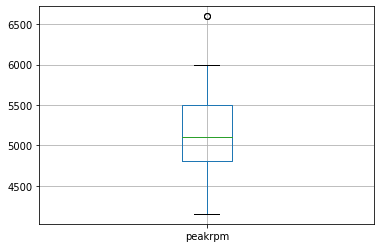

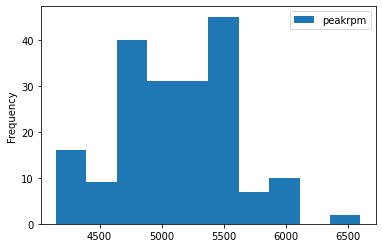

In [29]:
df[['peakrpm']].boxplot()
df[['peakrpm']].plot.hist(bins=10)

### Carwidth

<AxesSubplot:ylabel='Frequency'>

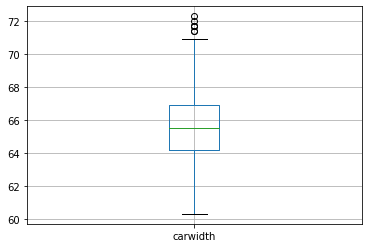

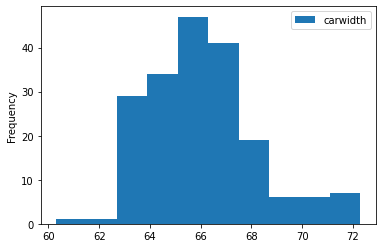

In [34]:
df[["carwidth"]].boxplot()
df[["carwidth"]].plot.hist(bins=10)

### Stroke

<AxesSubplot:ylabel='Frequency'>

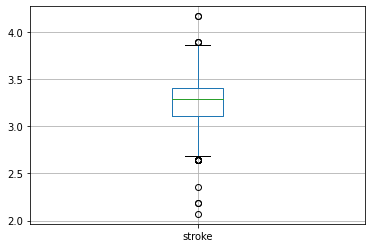

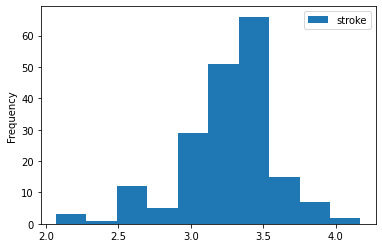

In [36]:
df[["stroke"]].boxplot()
df[["stroke"]].plot.hist(bins=10)

### Curbweight

<AxesSubplot:ylabel='Frequency'>

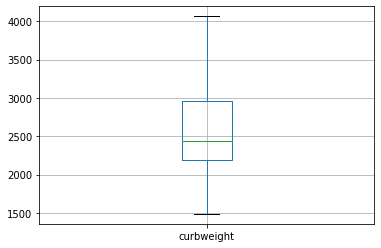

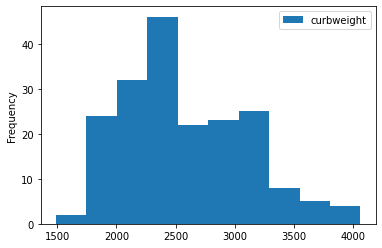

In [37]:
df[["curbweight"]].boxplot()
df[["curbweight"]].plot.hist(bins=10)

🚨 peakrpm, stroke & carwidth has outliers and normal distribution, So we will robust scaler. Which is insensitive to outliers

In [41]:
from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()

In [42]:
df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.fit_transform(df[['peakrpm','carwidth', 'stroke']]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


🚨 curbweight has normal distribution and no outliers, So we can use standard scaler 

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### Encoding
Encoding consists of transforming non-numerical data to an equivalent numerical form.
We will Assign a number to each category.

### aspiration & enginelocation

In [44]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [45]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [46]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### enginetype

enginetype is a multicategorical feature and must be One hot encoded.

In [47]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [48]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

enginetype_ohe = ohe.fit_transform(df[['enginetype']])

print(ohe.categories_) # Check the column order returned by the transformation

df['dohc'],df['dohcv'],df['l'],df['ohc'],df['ohcf'],df['ohcv'],df['rotor'] = enginetype_ohe.T

df.drop(columns='enginetype', inplace = True)

df.head()

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]


,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### cylindernumber

it is an ordinal feature and must be manually encoded.

In [49]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [50]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 "five":5,
                                                 'three': 3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### price

price is our target and can be label encoded

In [51]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Collinearity

Perform a collinearity investigation on the dataset and remove unecessary features.

<AxesSubplot:>

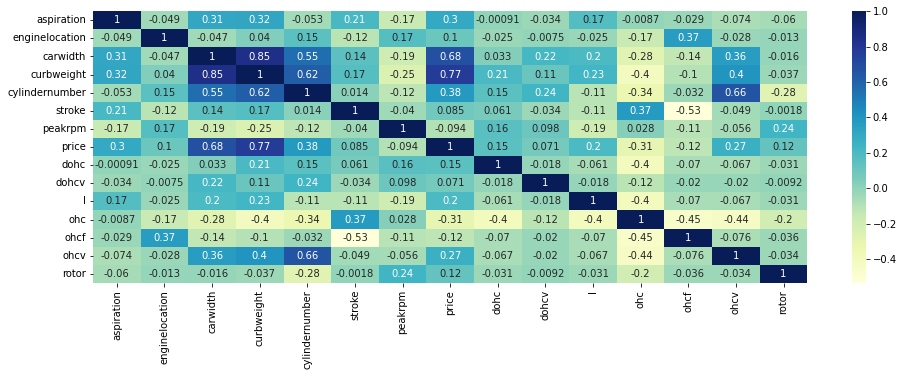

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr() # Pearson Correlation
plt.figure(figsize = (16,5))
# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu",
           annot=True)

In [61]:
df.drop(columns=['carwidth','ohcv','cylindernumber','ohcf'],inplace=True)

df.head()

,aspiration,enginelocation,curbweight,stroke,peakrpm,price,dohc,dohcv,l,ohc,rotor
0,0.0,0.0,-0.048068,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.476395,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-0.450474,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.478302,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,-0.126260,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0


### Modeling

Cross validate the model

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

0.874736842105263